In [1]:
import pandas as pd
import matplotlib.pyplot as plt
happiness2015 = pd.read_csv("C:/Users/obalana prosper/Videos/New folder (3)/World_Happiness_2015.csv") 
print("happiness 2015 csv file added successfully")
happiness2015.head()


happiness 2015 csv file added successfully


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
first_5 = happiness2015.head()

**Using loops to aggregate data**

let's visualize the happiness score of each country in `happiness2015`:

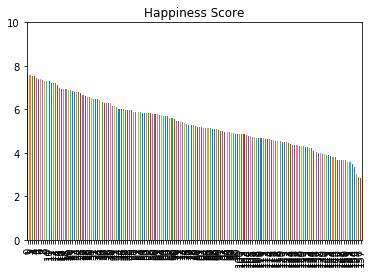

In [6]:
happiness2015['Happiness Score'].plot(kind = 'bar', title = 'Happiness Score', ylim =(0,10))

In [7]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

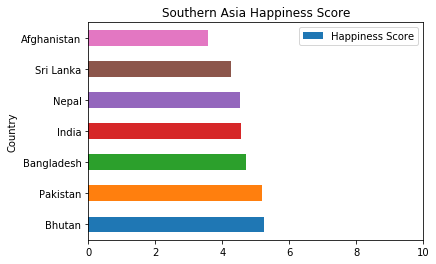

In [9]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x = 'Country',
             y = 'Happiness Score',
             kind = 'barh', 
             title = 'Southern Asia Happiness Score',
             xlim = (0,10))

In [18]:
mean_happiness = {}
region = happiness2015['Region'].unique()
for row in region:
    region_group = happiness2015[happiness2015['Region'] == row]
    region_group = region_group['Happiness Score'].mean()
    mean_happiness[row] = region_group

In [19]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

**Creating Groupby**

In [20]:
happiness2015['Region'].value_counts() 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [21]:
happiness2015.groupby('Region')

In [22]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [30]:
grouped = happiness2015.groupby('Region')
aus_nz =grouped.get_group('Australia and New Zealand')

In [31]:
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can also use the GroupBy.groups attribute to get more information

In [32]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [36]:
north_america = happiness2015.iloc[[4,14]]

In [38]:
grouped = happiness2015.groupby('Region')
na_group =grouped.get_group('North America')

In [39]:
na_group == north_america

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [44]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [50]:
grouped.sum()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,19,14.570,0.07454,2.58376,2.62890,1.83993,1.29062,0.78559,0.91063,4.53071
Central and Eastern Europe,2291,154.655,1.31102,27.33071,30.53823,20.84444,10.38979,2.51354,4.41565,58.62059
Eastern Asia,387,33.757,0.22335,6.91068,6.59656,5.26433,2.77494,0.76617,1.35531,10.08964
Latin America and Caribbean,1032,135.183,1.34479,19.28994,24.30385,15.48515,11.03827,2.57778,4.79133,57.69670
Middle East and Northern Africa,1552,108.138,0.92674,21.33947,18.40980,14.11231,7.23502,3.63404,3.80751,39.60017
North America,20,14.546,0.07392,2.72080,2.56972,1.76742,1.17901,0.48847,0.85916,4.96187
Southeastern Asia,731,47.857,0.38422,7.10149,8.46421,6.09621,5.01394,1.36148,3.77335,16.04718
Southern Asia,792,32.066,0.22513,3.92340,4.51725,3.78581,2.61336,0.71775,2.39000,14.11738
Sub-Saharan Africa,5116,168.112,2.21195,15.21892,32.36340,11.29327,14.63776,4.95511,8.84547,80.79920


In [51]:
grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [52]:
grouped.count()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


Aggregating Specific Columns with groupby

In [53]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

In [54]:
happy_mean = happy_grouped.mean()

In [55]:
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [62]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_max_mean = happy_grouped.agg([np.max, np.mean])

In [64]:
happy_max_mean

,amax,mean
Region,,
Australia and New Zealand,7.286,7.285000
Central and Eastern Europe,6.505,5.332931
Eastern Asia,6.298,5.626167
Latin America and Caribbean,7.226,6.144682
Middle East and Northern Africa,7.278,5.406900
North America,7.427,7.273000
Southeastern Asia,6.798,5.317444
Southern Asia,5.253,4.580857
Sub-Saharan Africa,5.477,4.202800


In [65]:
def dif(group):
    return (group.max() - group.mean())

In [67]:
max_mean_dif = happy_grouped.agg(dif)

In [68]:
max_mean_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

*Aggregation with pivot table*

In [69]:
happiness2015.pivot_table(values = 'Happiness Score', index = 'Region', aggfunc = np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


mean is the default aggregation function of df.pivot_table()

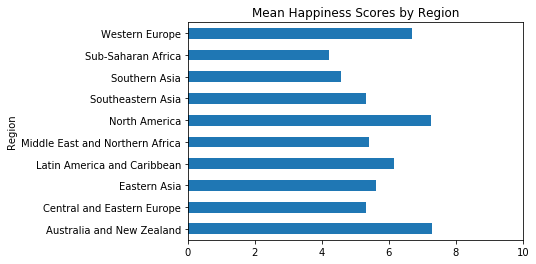

In [70]:
pv_happiness = happiness2015.pivot_table('Happiness Score','Region')
pv_happiness.plot(kind ='barh', title = 'Mean Happiness Scores by Region', xlim = (0,10), legend = False)

In [85]:
pv_happiness = happiness2015.pivot_table(values = 'Happiness Score',
                  index = 'Region', 
                  aggfunc = np.mean, 
                  margins = True)

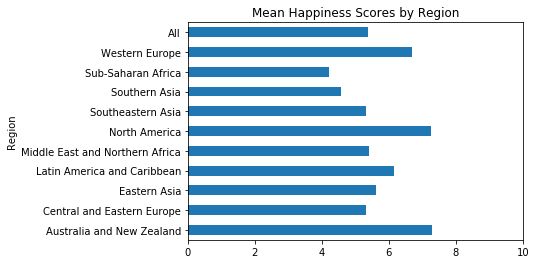

In [86]:
pv_happiness.plot(kind ='barh',
                  title = 'Mean Happiness Scores by Region', 
                  xlim = (0,10), 
                  legend = False)

In [81]:

world_mean_happiness = happiness2015['Happiness Score'].mean()

In [82]:
world_mean_happiness

5.3757341772151905

In [88]:
happiness2015.pivot_table('Happiness Score','Family')

,Happiness Score
Family,
0.00000,3.678
0.13995,2.839
0.30285,3.575
0.35386,3.340
0.38174,4.565
0.38562,4.297
0.41134,4.292
0.41411,5.194
0.41587,2.905


In [89]:
happiness2015.pivot_table(['Happiness Score','Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [90]:
happiness2015.pivot_table(['Happiness Score','Family'], 'Region', aggfunc = [np.mean, np.min, np.max], margins = True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [104]:
grouped = happiness2015.groupby('Region')
grouped = grouped['Happiness Score','Family']

In [106]:
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

In [114]:
happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [113]:
happiness2015.pivot_table(['Happiness Score','Family'],'Region', aggfunc = [np.mean, np.min, np.max], margins = True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587